<a href="https://colab.research.google.com/github/muhammad-umar-9/Python-Codes/blob/main/string_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('_Unicorn_Companies.csv')

In [21]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [22]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

<ipython-input-22-02ac3d9210b4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


In [23]:
df['Week'] = df['Date Joined'].dt.strftime('%Y-W%V')

In [24]:
df['Month'] = df['Date Joined'].dt.strftime('%Y-%m')
df['quarter'] = df['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['Date Joined'].dt.strftime('%Y')

In [11]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Week,Month,quarter,year
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017-W14,2017-04,2017-Q2,2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012-W48,2012-12,2012-Q4,2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018-W27,2018-07,2018-Q3,2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014-W04,2014-01,2014-Q1,2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011-W50,2011-12,2011-Q4,2011


In [25]:
# Create a new dataframe view of just 2018 data, summed by week.
Week_2018 = df[df['year'] == '2018'].groupby(['Week'])['Valuation'].sum().reset_index() # Select the 'Valuation ($)' column to sum
Week_2018.head()

# NOTE: In pandas v.2.X+ you must set 'numeric_only=True' in the sum() function or else it will throw an error

,Week,Valuation
0,2018-W02,$40B
1,2018-W03,$7B$2B
2,2018-W04,$3B$1B
3,2018-W07,$6B$6B$2B
4,2018-W08,$2B$1B


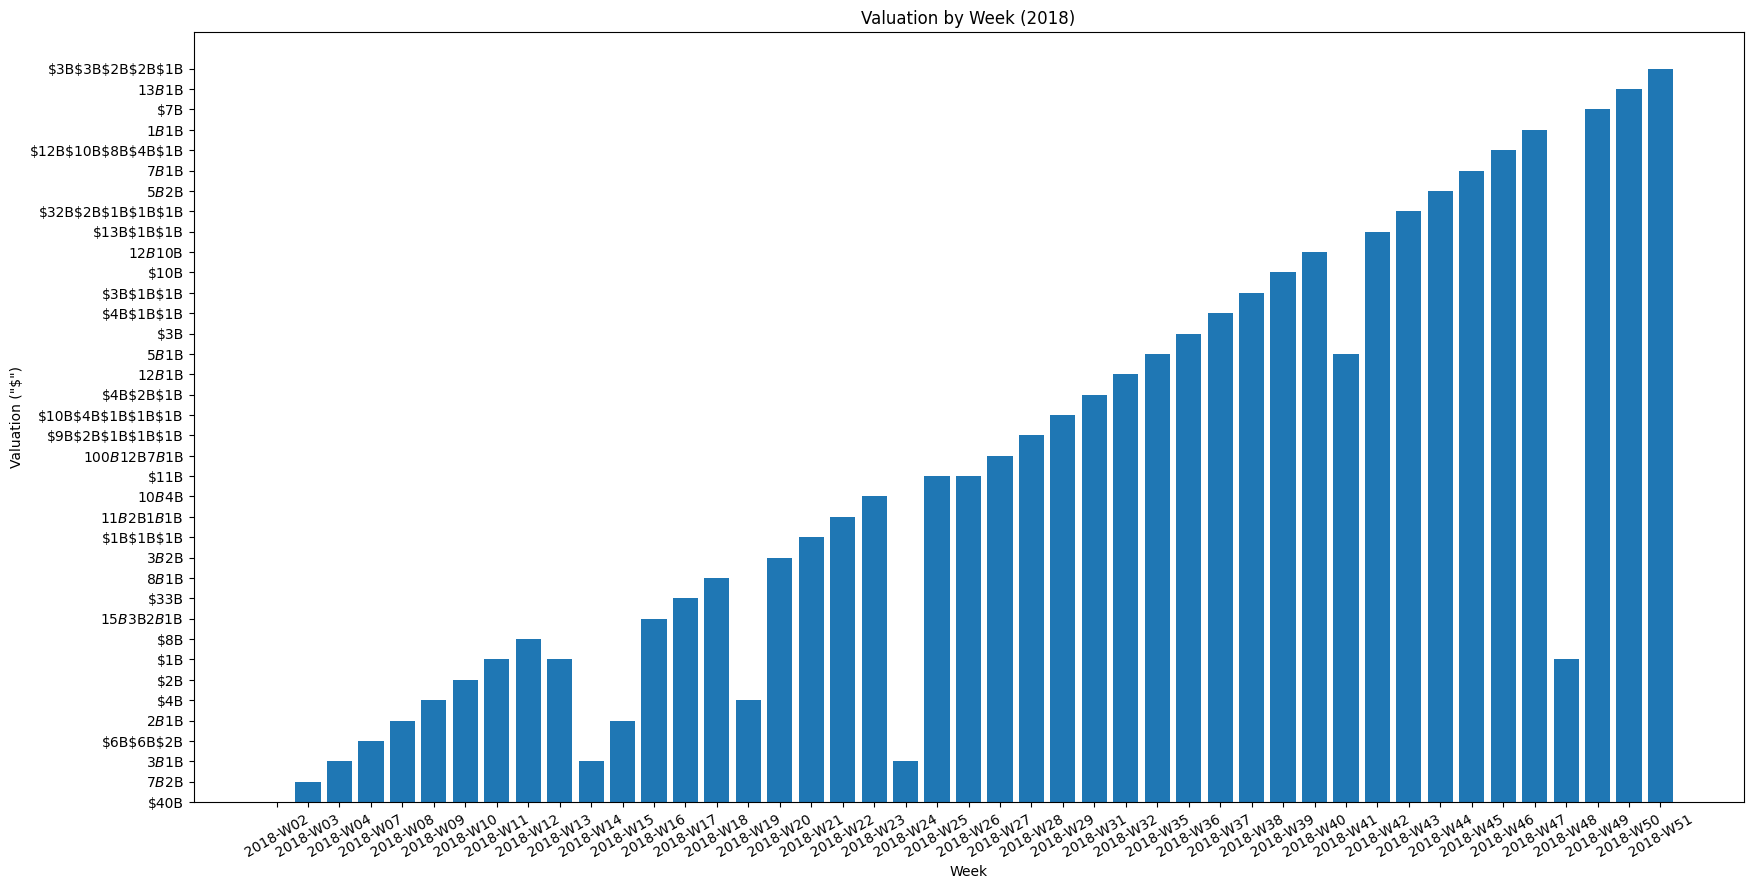

In [37]:
plt.figure(figsize = (20, 10)) # Increase output size.
plt.bar(x = Week_2018['Week'] , height = Week_2018['Valuation'])
plt.plot()
plt.xlabel('Week')
plt.ylabel('Valuation ("$")')
plt.title('Valuation by Week (2018)')
plt.xticks(rotation = 30 , fontsize = 10)
plt.show()